In [1]:
from pprint import pprint
import numpy as np

from one.api import ONE
from brainbox.io.one import SessionLoader, EphysSessionLoader
from ibllib.qc.camera import CameraQC
from iblatlas.atlas import AllenAtlas

2024-11-11 12:39:28 WARNING  camera.py:67   labcams not installed


In [2]:
mode = 'local'  # sets mode for all queries (one.seach* methods)
one = ONE(mode=mode)

In [15]:
# Note: remote queries *sometimes* need full dataset name?
# Note: dataset kwarg can be list, but only for local queries
# eids = one.search(project=['psychedelics'], datasets=['spikes.times.npy', '_iblrig_leftCamera.raw.mp4'], query_type='remote')
# print(len(eids))

In [3]:
eids_all = one.search(project='psychedelics')
print(f'Psychedelics sessions: {len(eids_all)}')

Psychedelics sessions: 74


In [4]:
eids_vid = one.search(project='psychedelics', dataset=['Camera'])
print(f'Psychedelics sessions with video: {len(eids_vid)}')

Psychedelics sessions with video: 59


In [5]:
eids_ephys = one.search(project='psychedelics', dataset=['ephys'])
print(f'Psychedelics sessions with ephys: {len(eids_ephys)}')

Psychedelics sessions with ephys: 29


In [6]:
eids_spikes = one.search(project='psychedelics', dataset=['spikes'])
print(f'Psychedelics sessions with spike sorting: {len(eids_spikes)}')

Psychedelics sessions with spike sorting: 28


In [7]:
# Note: NotImplementedError: Searching on insertions required remote connection
pids_spikes = one.search_insertions(project='psychedelics', dataset='spikes', query_type='remote')
print(f'Psychedelics probes with spike sorting: {len(pids_spikes)}')

Psychedelics probes with spike sorting: 48


In [8]:
eids = one.search(project='psychedelics', dataset=['spikes', 'Camera'], query_type='local')
print(f'Psychedelics sessions with spike sorting & video: {len(eids)}')

Psychedelics sessions with spike sorting & video: 28


In [9]:
eid = eids[0]
print(f'All datasets for session: {eid}')
pprint(one.list_datasets(eid))

All datasets for session: d77dd225-f7a9-4d01-996b-82c3ae73d56c
['_ibl_experiment.description.yaml',
 'alf/_ibl_bodyCamera.dlc.pqt',
 'alf/_ibl_bodyCamera.times.npy',
 'alf/_ibl_leftCamera.dlc.pqt',
 'alf/_ibl_leftCamera.times.npy',
 'alf/_ibl_rightCamera.dlc.pqt',
 'alf/_ibl_rightCamera.times.npy',
 'alf/bodyCamera.ROIMotionEnergy.npy',
 'alf/bodyROIMotionEnergy.position.npy',
 'alf/leftCamera.ROIMotionEnergy.npy',
 'alf/leftROIMotionEnergy.position.npy',
 'alf/probe00/electrodeSites.brainLocationIds_ccf_2017.npy',
 'alf/probe00/electrodeSites.localCoordinates.npy',
 'alf/probe00/electrodeSites.mlapdv.npy',
 'alf/probe00/pykilosort/_ibl_log.info_pykilosort.log',
 'alf/probe00/pykilosort/_kilosort_whitening.matrix.npy',
 'alf/probe00/pykilosort/_phy_spikes_subset.channels.npy',
 'alf/probe00/pykilosort/_phy_spikes_subset.spikes.npy',
 'alf/probe00/pykilosort/_phy_spikes_subset.waveforms.npy',
 'alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy',
 'alf/probe00/pykilosort/chan

In [10]:
def sessions_with_datasets(eids, datasets):
    eids_with_datasets = {}
    print('Proportion of sessions with')
    for name, dataset in datasets.items():
        has_dataset = [dataset in one.list_datasets(eid) for eid in eids]
        n = np.array(has_dataset).sum()
        prop = np.array(has_dataset).mean()
        print(f'    {name}: {prop:.2f} ({n}/{len(eids)})')
        eids_with_datasets[name] = np.array(eids)[has_dataset]
    return eids_with_datasets

In [16]:
one.mode = 'local'
datasets  = {
    'left_camera':  'raw_video_data/_iblrig_leftCamera.raw.mp4',
    'right_camera': 'raw_video_data/_iblrig_rightCamera.raw.mp4',
    'body_camera':  'raw_video_data/_iblrig_bodyCamera.raw.mp4'
}
eids_vid = sessions_with_datasets(eids, datasets)

Proportion of sessions with
    left_camera: 1.00 (28/28)
    right_camera: 1.00 (28/28)
    body_camera: 1.00 (28/28)


In [17]:
datasets  = {
    'left_ME':  'alf/leftCamera.ROIMotionEnergy.npy',
    'right_ME': 'alf/rightCamera.ROIMotionEnergy.npy',
    'body_ME':  'alf/bodyCamera.ROIMotionEnergy.npy'
}
eids_ME = sessions_with_datasets(eids, datasets)

Proportion of sessions with
    left_ME: 0.96 (27/28)
    right_ME: 0.96 (27/28)
    body_ME: 0.96 (27/28)


In [18]:
datasets  = {
    'left_DLC':  'alf/_ibl_leftCamera.dlc.pqt',
    'right_DLC': 'alf/_ibl_rightCamera.dlc.pqt',
    'body_DLC':  'alf/_ibl_bodyCamera.dlc.pqt'
}
eids_DLC = sessions_with_datasets(eids, datasets)

Proportion of sessions with
    left_DLC: 0.96 (27/28)
    right_DLC: 0.96 (27/28)
    body_DLC: 0.96 (27/28)


In [23]:
eid_missing_data = np.setdiff1d(eids_vid['left_camera'], eids_ME['left_ME'])[0]
print('Session with missing 
one.eid2ref(eid_vid_missing)

{'subject': 'ZFM-06048', 'date': datetime.date(2023, 5, 17), 'sequence': 1}

In [14]:
qc = CameraQC(one.eid2path(eids[0]), 'left', one=one)
outcome, extended = qc.run()
print(f'video QC = {outcome}')
extended

2024-11-11 12:40:32 INFO     camera.py:399  Computing QC outcome for left camera, session d77dd225-f7a9-4d01-996b-82c3ae73d56c
2024-11-11 12:40:32 INFO     camera.py:203  Gathering data for QC
2024-11-11 12:40:32 WARNING  raw_data_loaders.py:97   No data loaded: could not find raw data file
2024-11-11 12:40:32 WARNING  raw_data_loaders.py:97   No data loaded: could not find raw data file


TypeError: 'NoneType' object is not iterable

> /home/crombie/code/ibllib/ibllib/io/raw_data_loaders.py(798)load_bpod_fronts()
    796     BNC1_fronts = np.array([[np.nan, np.nan]])
    797     BNC2_fronts = np.array([[np.nan, np.nan]])
--> 798     for tr in data:
    799         BNC1_fronts = np.append(
    800             BNC1_fronts,



ipdb>  c


In [72]:
one.mode = 'remote'
video_body = one.load_dataset(eids[0], '_iblrig_leftCamera.raw.mp4', collection='raw_video_data')

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/raw_video_data/_iblrig_leftCamera.raw.mp4: 100%|█| 4.01G/


In [24]:
eid

'd77dd225-f7a9-4d01-996b-82c3ae73d56c'

In [38]:
one.mode = 'remote'
loader = SessionLoader(eid=eids[1], one=one)
loader.load_pose()

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/_ibl_leftCamera.dlc.pqt: 100%|█| 39.8M/39.8M [00:17<0
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/_ibl_rightCamera.dlc.pqt: 100%|█| 83.9M/83.9M [00:41<
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/_ibl_bodyCamera.dlc.pqt: 100%|█| 21.1M/21.1M [00:06<0


In [42]:
dx = np.diff(loader.pose['leftCamera']['nose_tip_x'])
dy = np.diff(loader.pose['leftCamera']['nose_tip_y'])

In [43]:
movement = np.sqrt(dx ** 2 + dy ** 2)

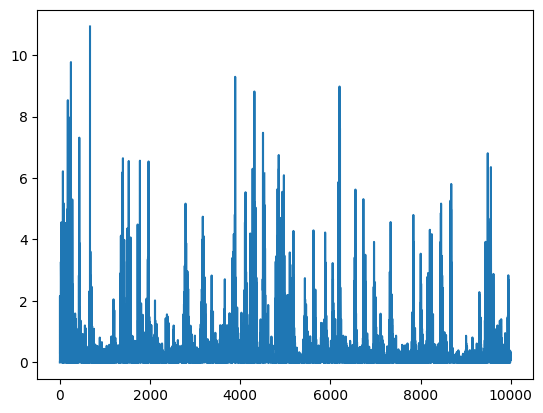

In [47]:
from matplotlib import pyplot as plt
plt.plot(movement[:10000])

In [31]:
one.load_dataset(eids[0], 'alf/bodyCamera.ROIMotionEnergy.npy')

array([5.17430735, 1.36335754, 1.25472152, ..., 0.26682809, 0.41113803,
       0.41113803])

In [113]:
# Download motion energy (and camera tpts)
one.mode = 'remote'
for eid in eids:
    loader = SessionLoader(eid=eid, one=one)
    try:
        loader.load_motion_energy()
    except KeyError:
        print("Failed:

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/leftCamera.ROIMotionEnergy.npy: 100%|█| 1.94M/1.94M [
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/_ibl_leftCamera.times.npy: 100%|█| 1.94M/1.94M [00:01
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/rightCamera.ROIMotionEnergy.npy: 100%|█| 4.87M/4.87M 
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/_ibl_rightCamera.times.npy: 100%|█| 4.87M/4.87M [00:0
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/_ibl_bodyCamera.times.npy: 100%|█| 13.6M/13.6M [00:04
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06301/2023-07-11/001/alf/bodyCamera.ROIMotionEnergy.npy: 100%|█| 13.6M/13.6M [
(S3)

KeyError: 'times'

> /home/crombie/code/ibllib/brainbox/io/one.py(1556)load_motion_energy()
   1554             # Double check if video timestamps are correct length or can be fixed
   1555             times_fixed, motion_energy = self._check_video_timestamps(
-> 1556                 view, me_raw['times'], me_raw['ROIMotionEnergy'])
   1557             self.motion_energy[f'{view}Camera'] = pd.DataFrame(columns=[names[view]], data=motion_energy)
   1558             self.motion_energy[f'{view}Camera'].insert(0, 'times', times_fixed)



ipdb>  c


(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/leftCamera.ROIMotionEnergy.npy: 100%|█| 1.92M/1.92M [
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/_ibl_leftCamera.times.npy: 100%|█| 1.92M/1.92M [00:06
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/_ibl_rightCamera.times.npy: 100%|█| 4.82M/4.82M [00:1
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/rightCamera.ROIMotionEnergy.npy: 100%|█| 4.82M/4.82M 
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-06296/2023-07-13/001/alf/bodyCamera.ROIMotionEnergy.npy: 100%|█| 13.5M/13.5M [


In [89]:
one.mode = 'remote'
pids = np.concatenate([one.eid2pid(eid)[0] for eid in eids])

In [ ]:
ssl = SpikeSortingLoader(one=one, pid=pid, atlas=AllenAtlas(res_um=10))
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

In [85]:
AllenAtlas?

Init signature: AllenAtlas(res_um=25, scaling=(1, 1, 1), mock=False, hist_path=None)
Docstring:     
The Allan Common Coordinate Framework (CCF) brain atlas.

Instantiates an atlas.BrainAtlas corresponding to the Allen CCF at the given resolution
using the IBL Bregma and coordinate system.
Init docstring:
Instantiates an atlas.BrainAtlas corresponding to the Allen CCF at the given resolution
using the IBL Bregma and coordinate system.

Parameters
----------
res_um : {10, 25, 50} int
    The Atlas resolution in micrometres; one of 10, 25 or 50um.
scaling : float, numpy.array
    Scale factor along ml, ap, dv for squeeze and stretch (default: [1, 1, 1]).
mock : bool
    For testing purposes, return atlas object with image comprising zeros.
hist_path : str, pathlib.Path
    The location of the image volume. May be a full file path or a directory.

Examples
--------
Instantiate Atlas from a non-default location, in this case the cache_dir of an ONE instance.
>>> target_dir = one.cache_dir 

(['b0b6a756-8b8a-4cee-9f4f-da0daab9790d',
  'a4d69060-1834-4c71-87fe-24eec1988bce'],
 ['probe00', 'probe01'])

In [ ]:
EphysSessionLoader